# 📘 Final ML Project - College Student Placement Prediction
This notebook covers EDA, preprocessing, modeling, and evaluation using Logistic Regression and Random Forest.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load dataset
df = pd.read_csv("college_student_placement_dataset.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


# Data Preprocessing

In [5]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [6]:
df.drop_duplicates()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


# Encode categorical columns

In [7]:
le = LabelEncoder()
df['Internship_Experience'] = le.fit_transform(df['Internship_Experience'])
df['Placement'] = le.fit_transform(df['Placement'])
df = df.drop('College_ID', axis=1)

# Placement distribution

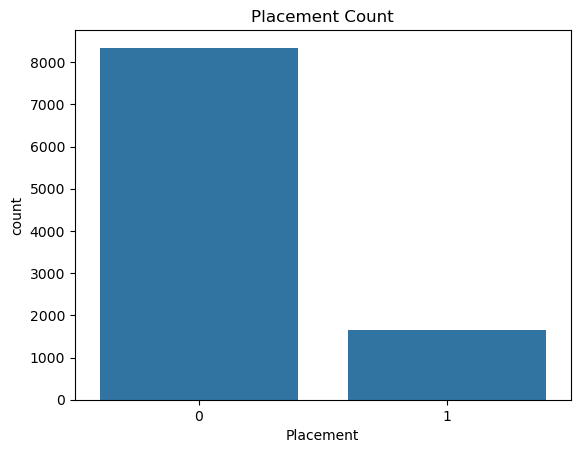

In [8]:
sns.countplot(x='Placement', data=df)
plt.title("Placement Count")
plt.show()

# Correlation Heatmap

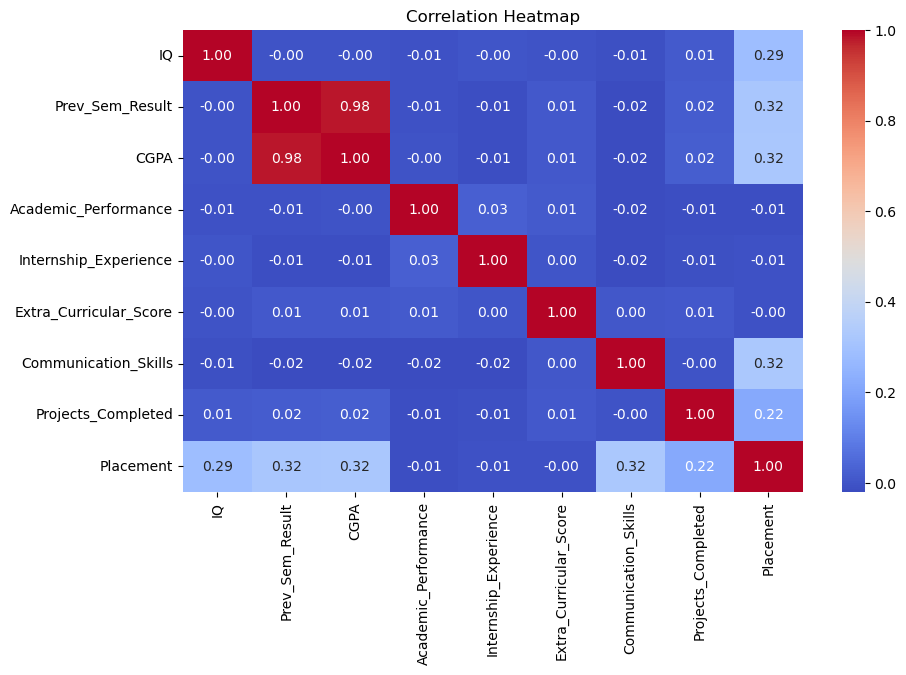

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Internship Experience Share

In [10]:
fig = px.pie(df, names='Internship_Experience', title='Internship Experience Share')
fig.show()

# Spilting data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Logisstic Regression

In [46]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.9035
[[1612   56]
 [ 137  195]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1668
           1       0.78      0.59      0.67       332

    accuracy                           0.90      2000
   macro avg       0.85      0.78      0.81      2000
weighted avg       0.90      0.90      0.90      2000



# Random Forest

In [47]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.998
[[1668    0]
 [   4  328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      0.99      0.99       332

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# Cross Validation
5 folds

In [48]:
rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores (accuracy for each fold):", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

Cross-validation scores (accuracy for each fold): [0.9995 0.9995 1.     0.9995 0.9995]
Average CV Accuracy: 0.9996


# Confusion Matrix

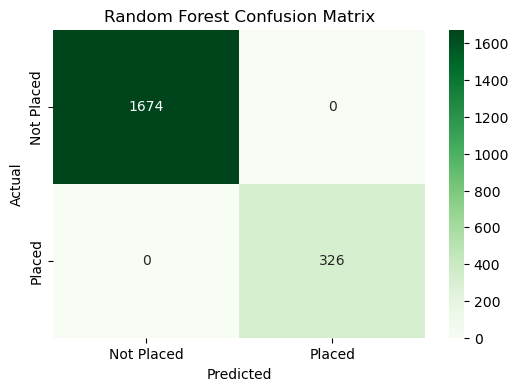

In [44]:
rf_cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=["Not Placed", "Placed"], 
            yticklabels=["Not Placed", "Placed"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
